### 01. Importing Libraries and Datasets

In [27]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans # Here is where you import the k-means algorithm from scikit-learn.
import pylab as pl # PyLab is a convenience module that bulk imports matplotlib.

In [28]:
# This command propts matplotlib visuals to appear in the notebook 

%matplotlib inline

In [29]:
# Creat path

path = r'C:\Users\Jimadek\Answer 6.5-Jaabir'

In [30]:
# Import life expectancy data

df = pd.read_csv(os.path.join(path,'02 Data','Original Data','Life_Expectancy_Clean.csv'), index_col=False)

In [31]:
df.shape

(2938, 24)

In [32]:
df.head()

Unnamed: 0      Country  Year      Status  Life expectancy  \
0           0  Afghanistan  2015  Developing             65.0   
1           1  Afghanistan  2014  Developing             59.9   
2           2  Afghanistan  2013  Developing             59.9   
3           3  Afghanistan  2012  Developing             59.5   
4           4  Afghanistan  2011  Developing             59.2   

   Adult mortality  Infant deaths  Alcohol  Percentage expenditure  \
0            263.0             62     0.01               71.279624   
1            271.0             64     0.01               73.523582   
2            268.0             66     0.01               73.219243   
3            272.0             69     0.01               78.184215   
4            275.0             71     0.01                7.097109   

   Hepatitis B  ...  Total expenditure  Diphtheria  HIV/AIDS         GDP  \
0         65.0  ...               8.16        65.0       0.1  584.259210   
1         62.0  ...               8.18        62.0       0.1  612.696514   
2         64.0  ...               8.13        64.0       0.1  631.744976   
3         67.0  ...               8.52        67.0       0.1  669.959000   
4         68.0  ...               7.87        68.0       0.1   63.537231   

   Population  Thinness 1-19 years  Thinness 5-9 years  \
0  33736494.0                 17.2                17.3   
1    327582.0                 17.5                17.5   
2  31731688.0                 17.7                17.7   
3   3696958.0                 17.9                18.0   
4   2978599.0                 18.2                18.2   

   Income composition of resources  Schooling  Continent  
0                            0.479       10.1       Asia  
1                            0.476       10.0       Asia  
2                            0.470        9.9       Asia  
3                            0.463        9.8       Asia  
4                            0.454        9.5       Asia  

[5 rows x 24 columns]

In [33]:
# Remove column 'Unnamed: 0'

df.drop('Unnamed: 0', axis = 1, inplace = True)

In [34]:
# Removing all categorical variables

df.drop(['Country','Year','Status','Continent'], axis = 1, inplace = True)

In [44]:
df.head()

Life expectancy  Adult mortality  Infant deaths  Alcohol  \
0             65.0            263.0             62     0.01   
1             59.9            271.0             64     0.01   
2             59.9            268.0             66     0.01   
3             59.5            272.0             69     0.01   
4             59.2            275.0             71     0.01   

   Percentage expenditure  Hepatitis B  Measles    BMI  under-five deaths   \
0               71.279624         65.0      1154  19.1                  83   
1               73.523582         62.0       492  18.6                  86   
2               73.219243         64.0       430  18.1                  89   
3               78.184215         67.0      2787  17.6                  93   
4                7.097109         68.0      3013  17.2                  97   

   Polio  Total expenditure  Diphtheria  HIV/AIDS         GDP  Population  \
0    6.0               8.16        65.0       0.1  584.259210  33736494.0   
1   58.0               8.18        62.0       0.1  612.696514    327582.0   
2   62.0               8.13        64.0       0.1  631.744976  31731688.0   
3   67.0               8.52        67.0       0.1  669.959000   3696958.0   
4   68.0               7.87        68.0       0.1   63.537231   2978599.0   

   Thinness 1-19 years  Thinness 5-9 years  Income composition of resources  \
0                 17.2                17.3                            0.479   
1                 17.5                17.5                            0.476   
2                 17.7                17.7                            0.470   
3                 17.9                18.0                            0.463   
4                 18.2                18.2                            0.454   

   Schooling  
0       10.1  
1       10.0  
2        9.9  
3        9.8  
4        9.5

### 02. The elbow technique


In [45]:
# Define the range of potential clusters in the data.
num_cl = range(1, 10)

# Define k-means clusters in the range assigned above.
kmeans = [KMeans(n_clusters=i) for i in num_cl] 

In [46]:
# Create a score that represents a rate of variation for the given cluster option.
score = [kmeans[i].fit(df).score(df) for i in range(len(kmeans))] 

score

C:\Users\Jimadek\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Jimadek\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=12.
  warnings.warn(
C:\Users\Jimadek\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Jimadek\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the 

[-8.635744151505702e+18,
 -1.8039051117891853e+18,
 -6.528821240321608e+17,
 -3.104646020312817e+17,
 -2.202621642684312e+17,
 -1.70511124922002e+17,
 -1.2509687636070139e+17,
 -9.256509374199837e+16,
 -7.631423483660526e+16]

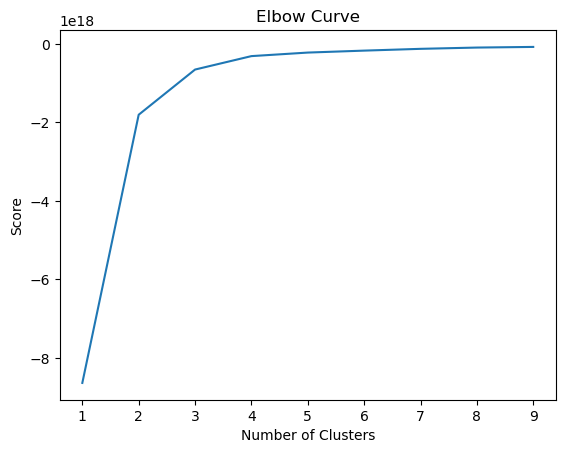

In [47]:
# Plot the elbow curve using PyLab.

pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

##### Based on the elbow, the optimal number of clusters is 3. After value of 3 on the x-axis the curve flattens out.

### 03. K-means clustering

In [48]:
# Create the k-means object.

kmeans = KMeans(n_clusters = 3,)

In [49]:
# Fit the k-means object to the data.

kmeans.fit(df)

C:\Users\Jimadek\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Jimadek\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=12.
  warnings.warn(


KMeans(n_clusters=3)

In [53]:
# Create a column in the dataframe with values corresponding to which cluster every observation belongs

df['Clusters'] = kmeans.fit_predict(df)

C:\Users\Jimadek\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Jimadek\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=12.
  warnings.warn(


In [51]:
df.head()

Life expectancy  Adult mortality  Infant deaths  Alcohol  \
0             65.0            263.0             62     0.01   
1             59.9            271.0             64     0.01   
2             59.9            268.0             66     0.01   
3             59.5            272.0             69     0.01   
4             59.2            275.0             71     0.01   

   Percentage expenditure  Hepatitis B  Measles    BMI  under-five deaths   \
0               71.279624         65.0      1154  19.1                  83   
1               73.523582         62.0       492  18.6                  86   
2               73.219243         64.0       430  18.1                  89   
3               78.184215         67.0      2787  17.6                  93   
4                7.097109         68.0      3013  17.2                  97   

   Polio  Total expenditure  Diphtheria  HIV/AIDS         GDP  Population  \
0    6.0               8.16        65.0       0.1  584.259210  33736494.0   
1   58.0               8.18        62.0       0.1  612.696514    327582.0   
2   62.0               8.13        64.0       0.1  631.744976  31731688.0   
3   67.0               8.52        67.0       0.1  669.959000   3696958.0   
4   68.0               7.87        68.0       0.1   63.537231   2978599.0   

   Thinness 1-19 years  Thinness 5-9 years  Income composition of resources  \
0                 17.2                17.3                            0.479   
1                 17.5                17.5                            0.476   
2                 17.7                17.7                            0.470   
3                 17.9                18.0                            0.463   
4                 18.2                18.2                            0.454   

   Schooling  Clusters  
0       10.1         1  
1       10.0         1  
2        9.9         1  
3        9.8         1  
4        9.5         1

In [54]:
df['Clusters'].value_counts()

0    2867
2      66
1       5
Name: Clusters, dtype: int64

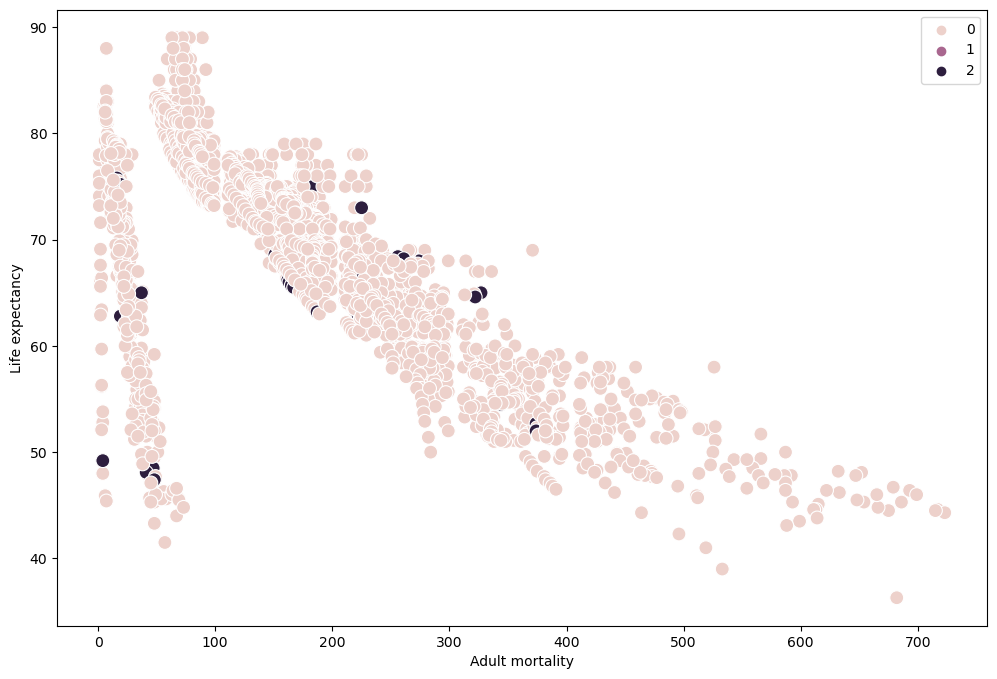

In [55]:
# Plot the clusters for the "Adult mortality" and "Life expectancy" variables.

plt.figure(figsize = (12,8))
ax = sns.scatterplot(x = df['Adult mortality'], y = df['Life expectancy'], hue = kmeans.labels_, s = 100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Adult mortality')
plt.ylabel('Life expectancy')
plt.show()

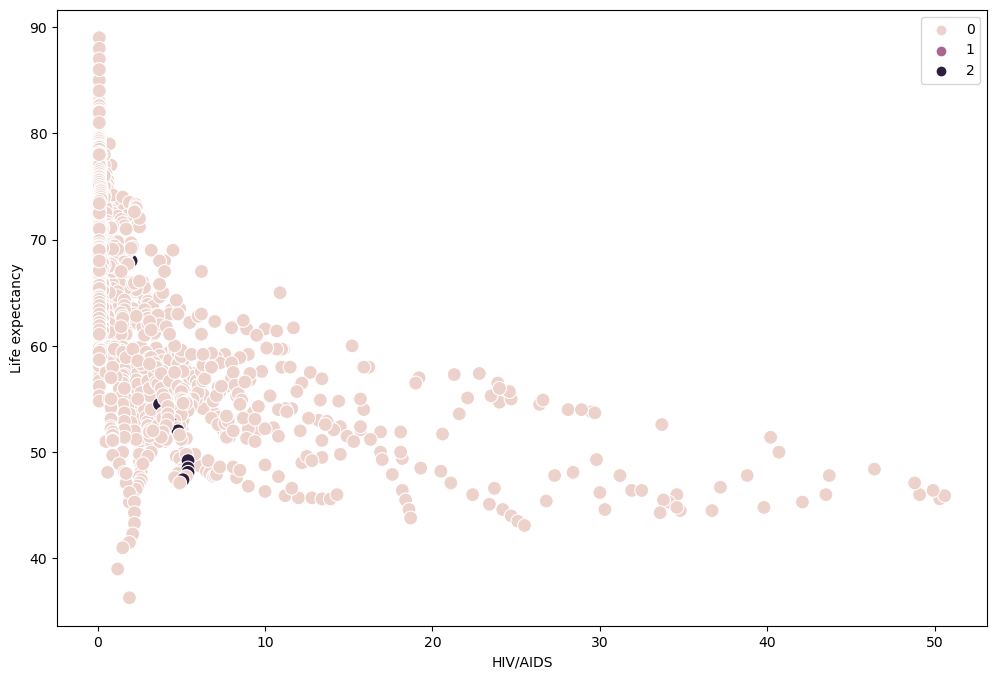

In [56]:
# Plot the clusters for the "HIV/AIDS" and "Life expectancy" variables.

plt.figure(figsize = (12,8))
ax = sns.scatterplot(x = df['HIV/AIDS'], y = df['Life expectancy'], hue = kmeans.labels_, s = 100) 

ax.grid(False)
plt.xlabel('HIV/AIDS')
plt.ylabel('Life expectancy')
plt.show()

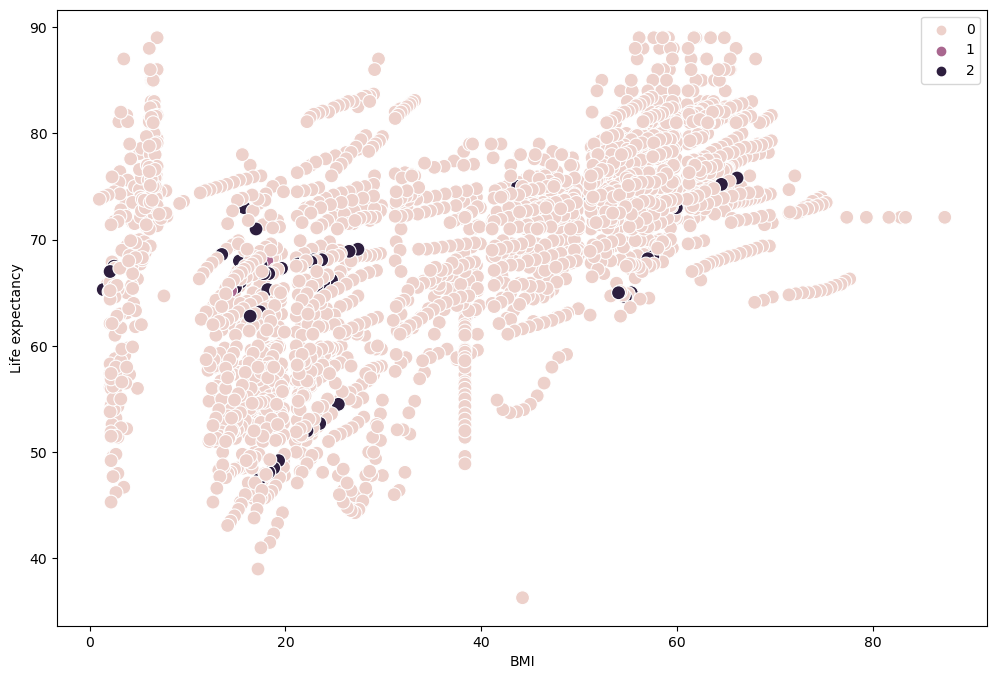

In [57]:
# Plot the clusters for the "BMI" and "Life expectancy" variables.

plt.figure(figsize = (12,8))
ax = sns.scatterplot(x = df['BMI'], y = df['Life expectancy'], hue = kmeans.labels_, s = 100) 

ax.grid(False)
plt.xlabel('BMI')
plt.ylabel('Life expectancy')
plt.show()

### 04. Observations

### Adult mortality vs Life expectancy

##### The first cluster, in dark purple (coded as “2” in the legend), is scattered around the cluster but falls below 400 mortaluty and life expectancy of 80. 

##### The seccond cluster, in medium purple (coded as "1" in the legend), is not represented in the cluster.

##### The third cluster, in pink (coded as "0" in the legend), is the most populated cluster which gathers the data points across the chart (up to 90 years and over 700 mortality).
 
### HIV/AIDS vs Life expectancy

##### The first cluster, in dark purple (coded as “2” in the legend), has few points below 7 HIV/AIDS and less than 70 years life expectancy  

##### The seccond cluster, in medium purple (coded as "1" in the legend), is not represented in the cluster.

##### The third cluster, in pink (coded as "0" in the legend), is the most populated cluster which gathers the data points across the chart (up to 88 years and over 50 HIV/AIDS).
  
### BMI vs Life expectancy

##### The first cluster, in dark purple (coded as “2” in the legend), is scattered around the cluster but has most points around 20 BMI and 70 years life expectancy  

##### The seccond cluster, in medium purple (coded as "1" in the legend), has few points in their 60s and less than 20 BMI.

##### The third cluster, in pink (coded as "0" in the legend), is the most populated cluster which gathers the data points across the chart (up to 88 years and over 80 BMI).

### 05. Descriptive statistics

In [24]:
df.loc[df['clusters'] == 2, 'cluster'] = 'dark purple'
df.loc[df['clusters'] == 1, 'cluster'] = 'purple'
df.loc[df['clusters'] == 0, 'cluster'] = 'pink'

In [26]:
df.groupby('cluster').agg({'Adult mortality':['mean', 'median'], 
                         'BMI':['mean', 'median'], 
                         'HIV/AIDS':['mean', 'median'],
                          'Life expectancy':['mean', 'median']})

Adult mortality               BMI         HIV/AIDS         \
                       mean median       mean median      mean median   
cluster                                                                 
dark purple      132.600000  184.0  14.580000  13.90  0.280000    0.3   
pink             154.318182  166.0  31.545455  23.05  0.748485    0.1   
purple           165.021277  144.0  38.518634  43.20  1.767527    0.1   

            Life expectancy         
                       mean median  
cluster                             
dark purple       65.280000  64.80  
pink              67.651515  67.65  
purple            69.278061  72.20

### 06. Next Step

#### The k-means clustering model has shown some interesting insights but, exploring some more variables in the analysis may unviel some more vital insights inot understanding the combination of variables the influence life expectancy across the globe.